In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Disables all deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### CRIANDO O DATAFRAME A PARTIR DOS ARQUIVOS 'TRAIN.CSV' E 'TRAINING_EXTRA.CSV'

In [2]:
df_1 = pd.read_csv("../data/train.csv")
df_2 = pd.read_csv("../data/training_extra.csv")
df = pd.concat([df_1, df_2], axis=0)
df.set_index('id', inplace=True)
df

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...
4194313,Nike,Canvas,NaN,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470


### COLETANDO INFORMAÇÕES GERAIS SOBRE AS COLUNAS

In [3]:
data = []

for column in df.columns:
    if df[column].dtype == 'category' or df[column].dtype == 'object' or df[column].dtype == 'string':
        column_info = {
            'Name': column,
            'Dtype': df[column].dtype,
            'NaN values': df[column].isna().sum(),
            'Unique values': df[column].unique()
        }
    else:
        column_info = {
            'Name': column,
            'Dtype': df[column].dtype,
            'NaN values': df[column].isna().sum(),
            'Unique values': '------------------------------------------'
        }

    data.append(column_info)

info_df = pd.DataFrame(data)
info_df

,Name,Dtype,NaN values,Unique values
0,Brand,object,126758,"[Jansport, Under Armour, Nike, Adidas, Puma, nan]"
1,Material,object,110962,"[Leather, Canvas, Nylon, nan, Polyester]"
2,Size,object,87785,"[Medium, Small, Large, nan]"
3,Compartments,float64,0,------------------------------------------
4,Laptop Compartment,object,98533,"[Yes, No, nan]"
5,Waterproof,object,94324,"[No, Yes, nan]"
6,Style,object,104180,"[Tote, Messenger, nan, Backpack]"
7,Color,object,133617,"[Black, Green, Red, Blue, Gray, Pink, nan]"
8,Weight Capacity (kg),float64,1808,------------------------------------------
9,Price,float64,0,------------------------------------------


### ANALISANDO AS VARIÁVEIS NUMÉRICAS

In [4]:
desc = df.describe()
desc = desc.map(lambda x: f"{x:.2f}")
desc

,Compartments,Weight Capacity (kg),Price
count,3994318.00,3992510.00,3994318.00
mean,5.43,18.01,81.36
std,2.89,6.97,38.94
min,1.00,5.00,15.00
25%,3.00,12.07,47.47
50%,5.00,18.05,80.98
75%,8.00,23.99,114.86
max,10.00,30.00,150.00


### CHECANDO DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS E OUTLIERS

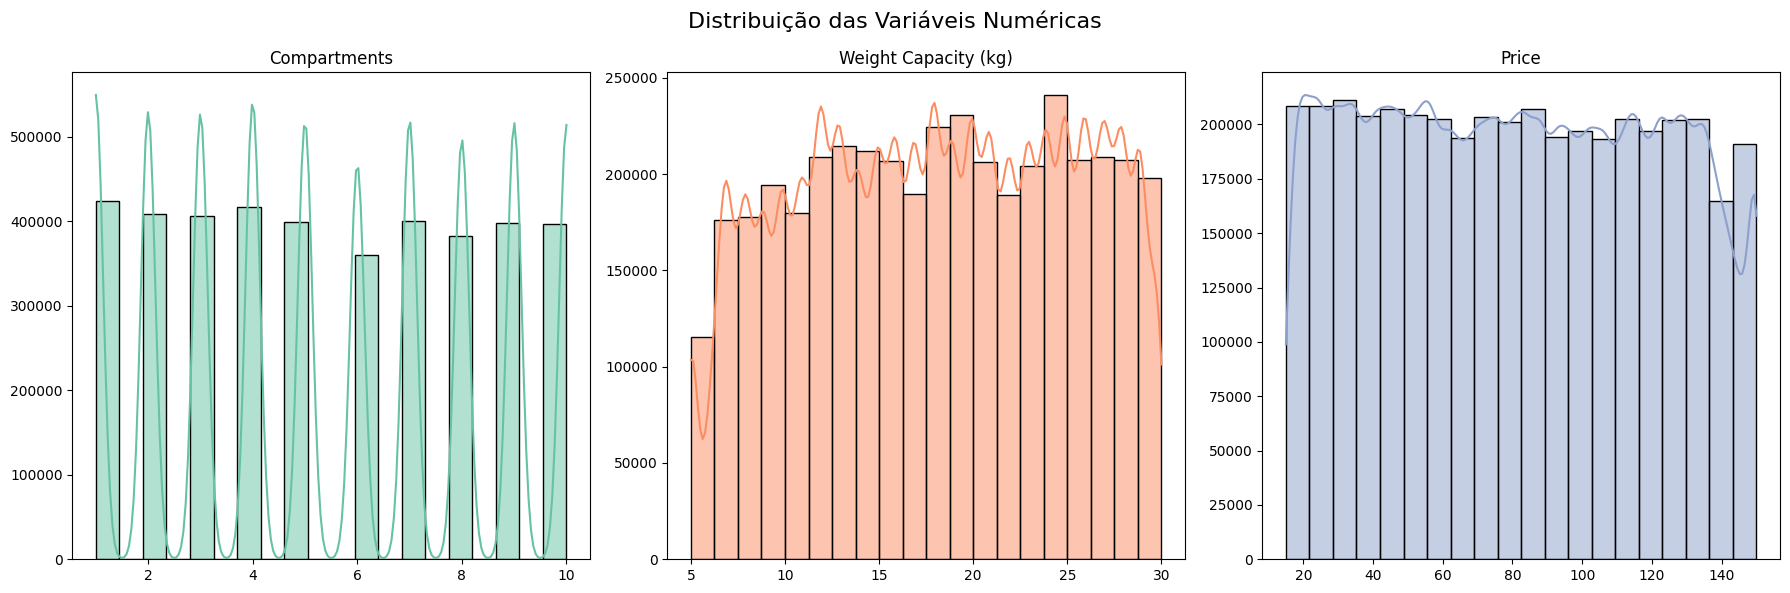

In [5]:
num_columns = ['Compartments', 'Weight Capacity (kg)', 'Price']

# Histograms for numerical columns
plt.figure(figsize=(18, 6))
counter = 1
palette = sns.color_palette("Set2")
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

for column in num_columns:
    plt.subplot(1, 3, counter)
    sns.histplot(df[column], kde=True, bins=20, color=sns.color_palette("Set2")[counter - 1], edgecolor="black")
    plt.title(f'{column}')
    plt.xlabel("")
    plt.ylabel("")
    counter += 1

plt.tight_layout()
plt.show()

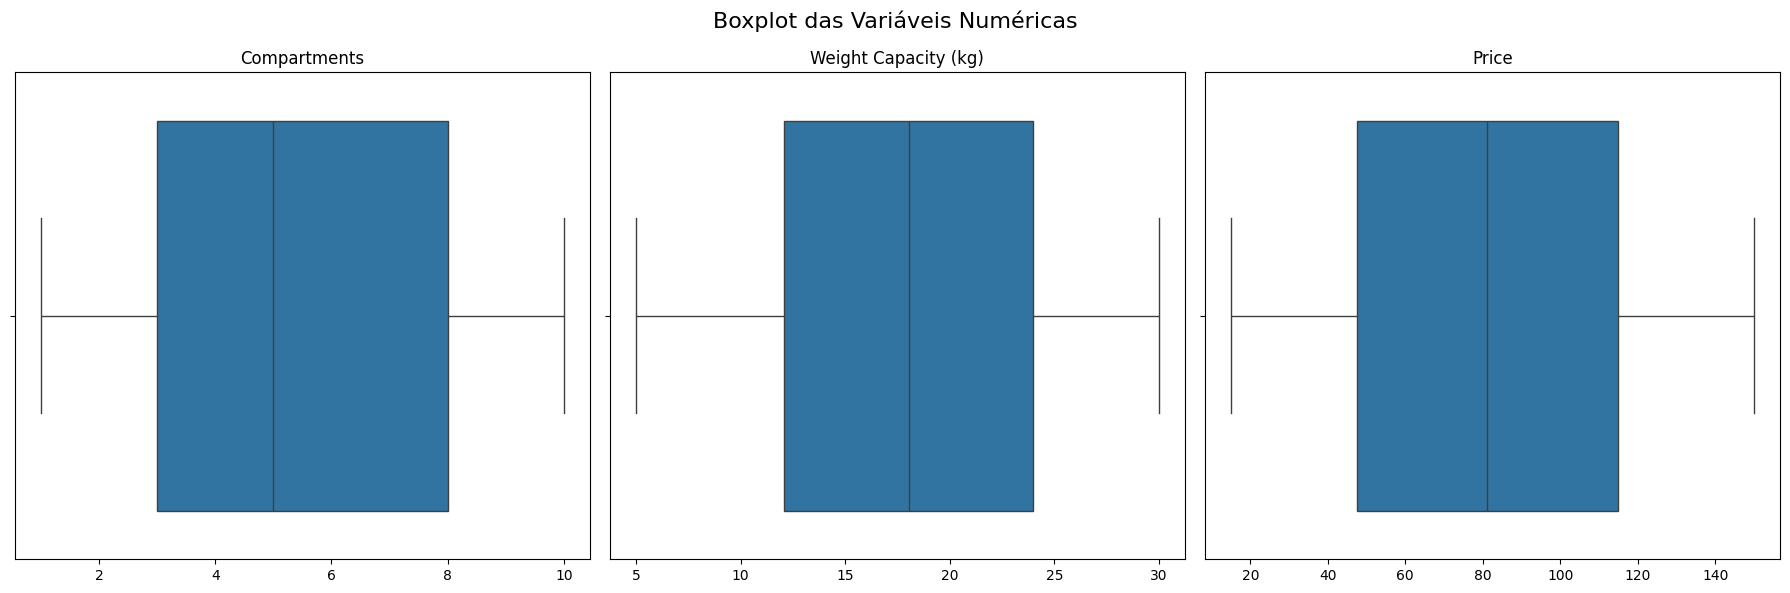

In [6]:
# Boxplot for numerical columns
plt.figure(figsize=(18, 6))
counter = 1
plt.suptitle('Boxplot das Variáveis Numéricas', fontsize=16)

for column in num_columns:
    plt.subplot(1, 3, counter)
    sns.boxplot(data=df, x=column, fliersize=5)
    plt.title(f'{column}')
    plt.xlabel("")
    plt.ylabel("")
    counter += 1

plt.tight_layout()
plt.show()

In [7]:
# Outliers percentuals
for column in num_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    sup_lim = Q3 + 1.5 * IQR
    inf_lim = Q1 - 1.5 * IQR
    above_sup_lim = len(df[df[column] > sup_lim]) / len(df)
    under_inf_lim = len(df[df[column] < inf_lim]) / len(df)
    outliers_percentual = above_sup_lim + under_inf_lim
    print(f"{column}: {outliers_percentual}")

Compartments: 0.0
Weight Capacity (kg): 0.0
Price: 0.0


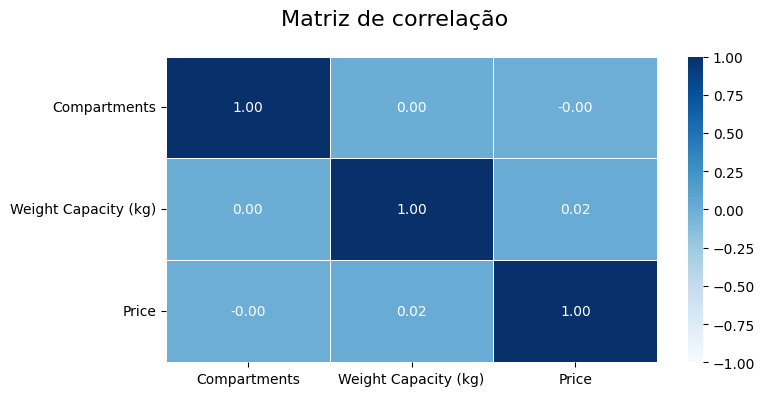

In [8]:
# Correlation matrix
df_numerical = df.select_dtypes(include=['float64'])
correlation = df_numerical.corr()
plt.figure(figsize=(8, 4))
plt.suptitle('Matriz de correlação', fontsize=16)
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

### CHECANDO DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS

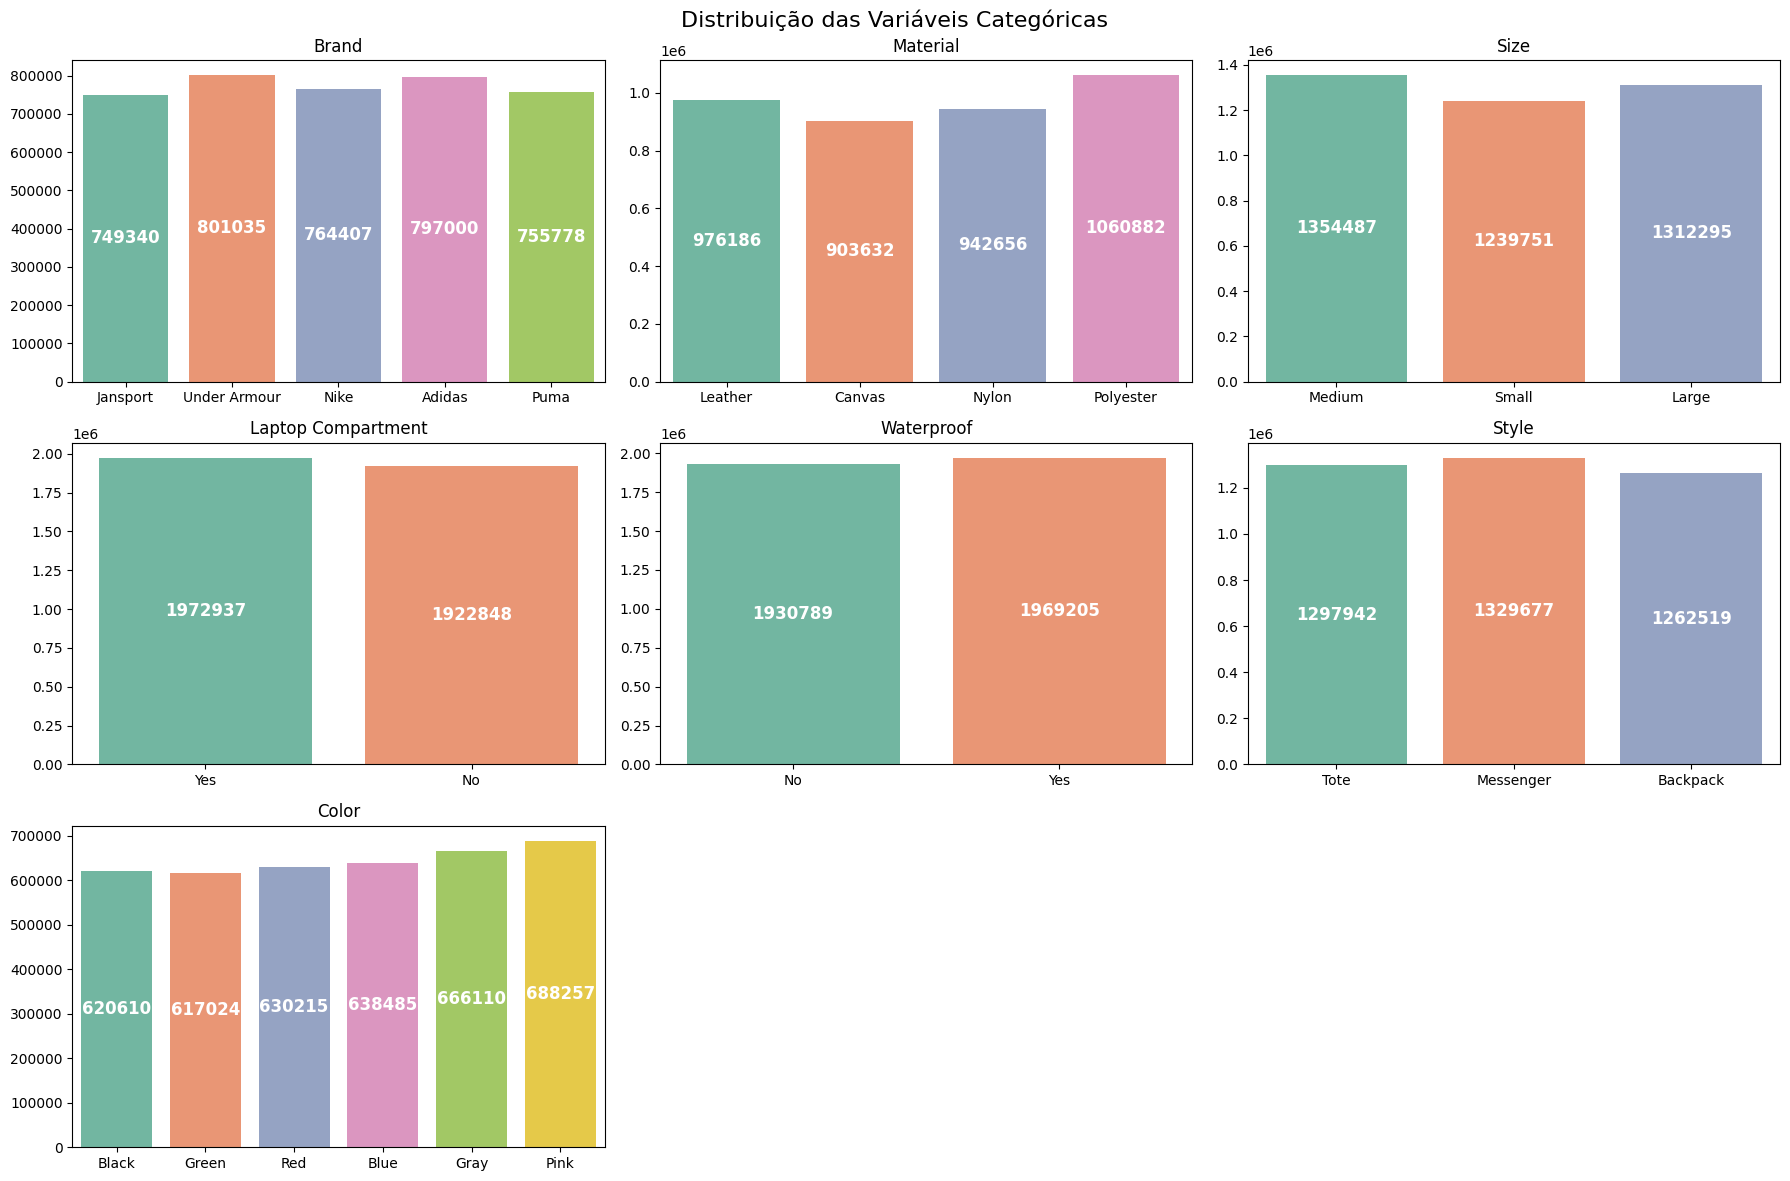

In [9]:
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

plt.figure(figsize=(18, 12))
counter = 1
plt.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)

for column in cat_columns:
    plt.subplot(3, 3, counter)
    ax = sns.countplot(x=column, data=df, palette = "Set2")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), 
        ha='center', va='center', 
        fontsize=12, color='white', fontweight='bold')
    plt.title(f'{column}')
    plt.xlabel("")
    plt.ylabel("")
    counter += 1
            
plt.tight_layout()
plt.show()

In [10]:
# Calculating frequencies' percentuals
for column in cat_columns:
    print(f"\nRelative frequencies for {column}: ")
    freq_percentage = df[column].value_counts(normalize=True) * 100
    print(freq_percentage)


Relative frequencies for Brand: 
Brand
Under Armour    20.711637
Adidas          20.607308
Nike            19.764580
Puma            19.541468
Jansport        19.375006
Name: proportion, dtype: float64

Relative frequencies for Material: 
Material
Polyester    27.318690
Leather      25.137690
Nylon        24.274262
Canvas       23.269358
Name: proportion, dtype: float64

Relative frequencies for Size: 
Size
Medium    34.672355
Large     33.592318
Small     31.735326
Name: proportion, dtype: float64

Relative frequencies for Laptop Compartment: 
Laptop Compartment
Yes    50.642861
No     49.357139
Name: proportion, dtype: float64

Relative frequencies for Waterproof: 
Waterproof
Yes    50.492514
No     49.507486
Name: proportion, dtype: float64

Relative frequencies for Style: 
Style
Messenger    34.180715
Tote         33.364935
Backpack     32.454350
Name: proportion, dtype: float64

Relative frequencies for Color: 
Color
Pink     17.827255
Gray     17.253602
Blue     16.538059
Red   

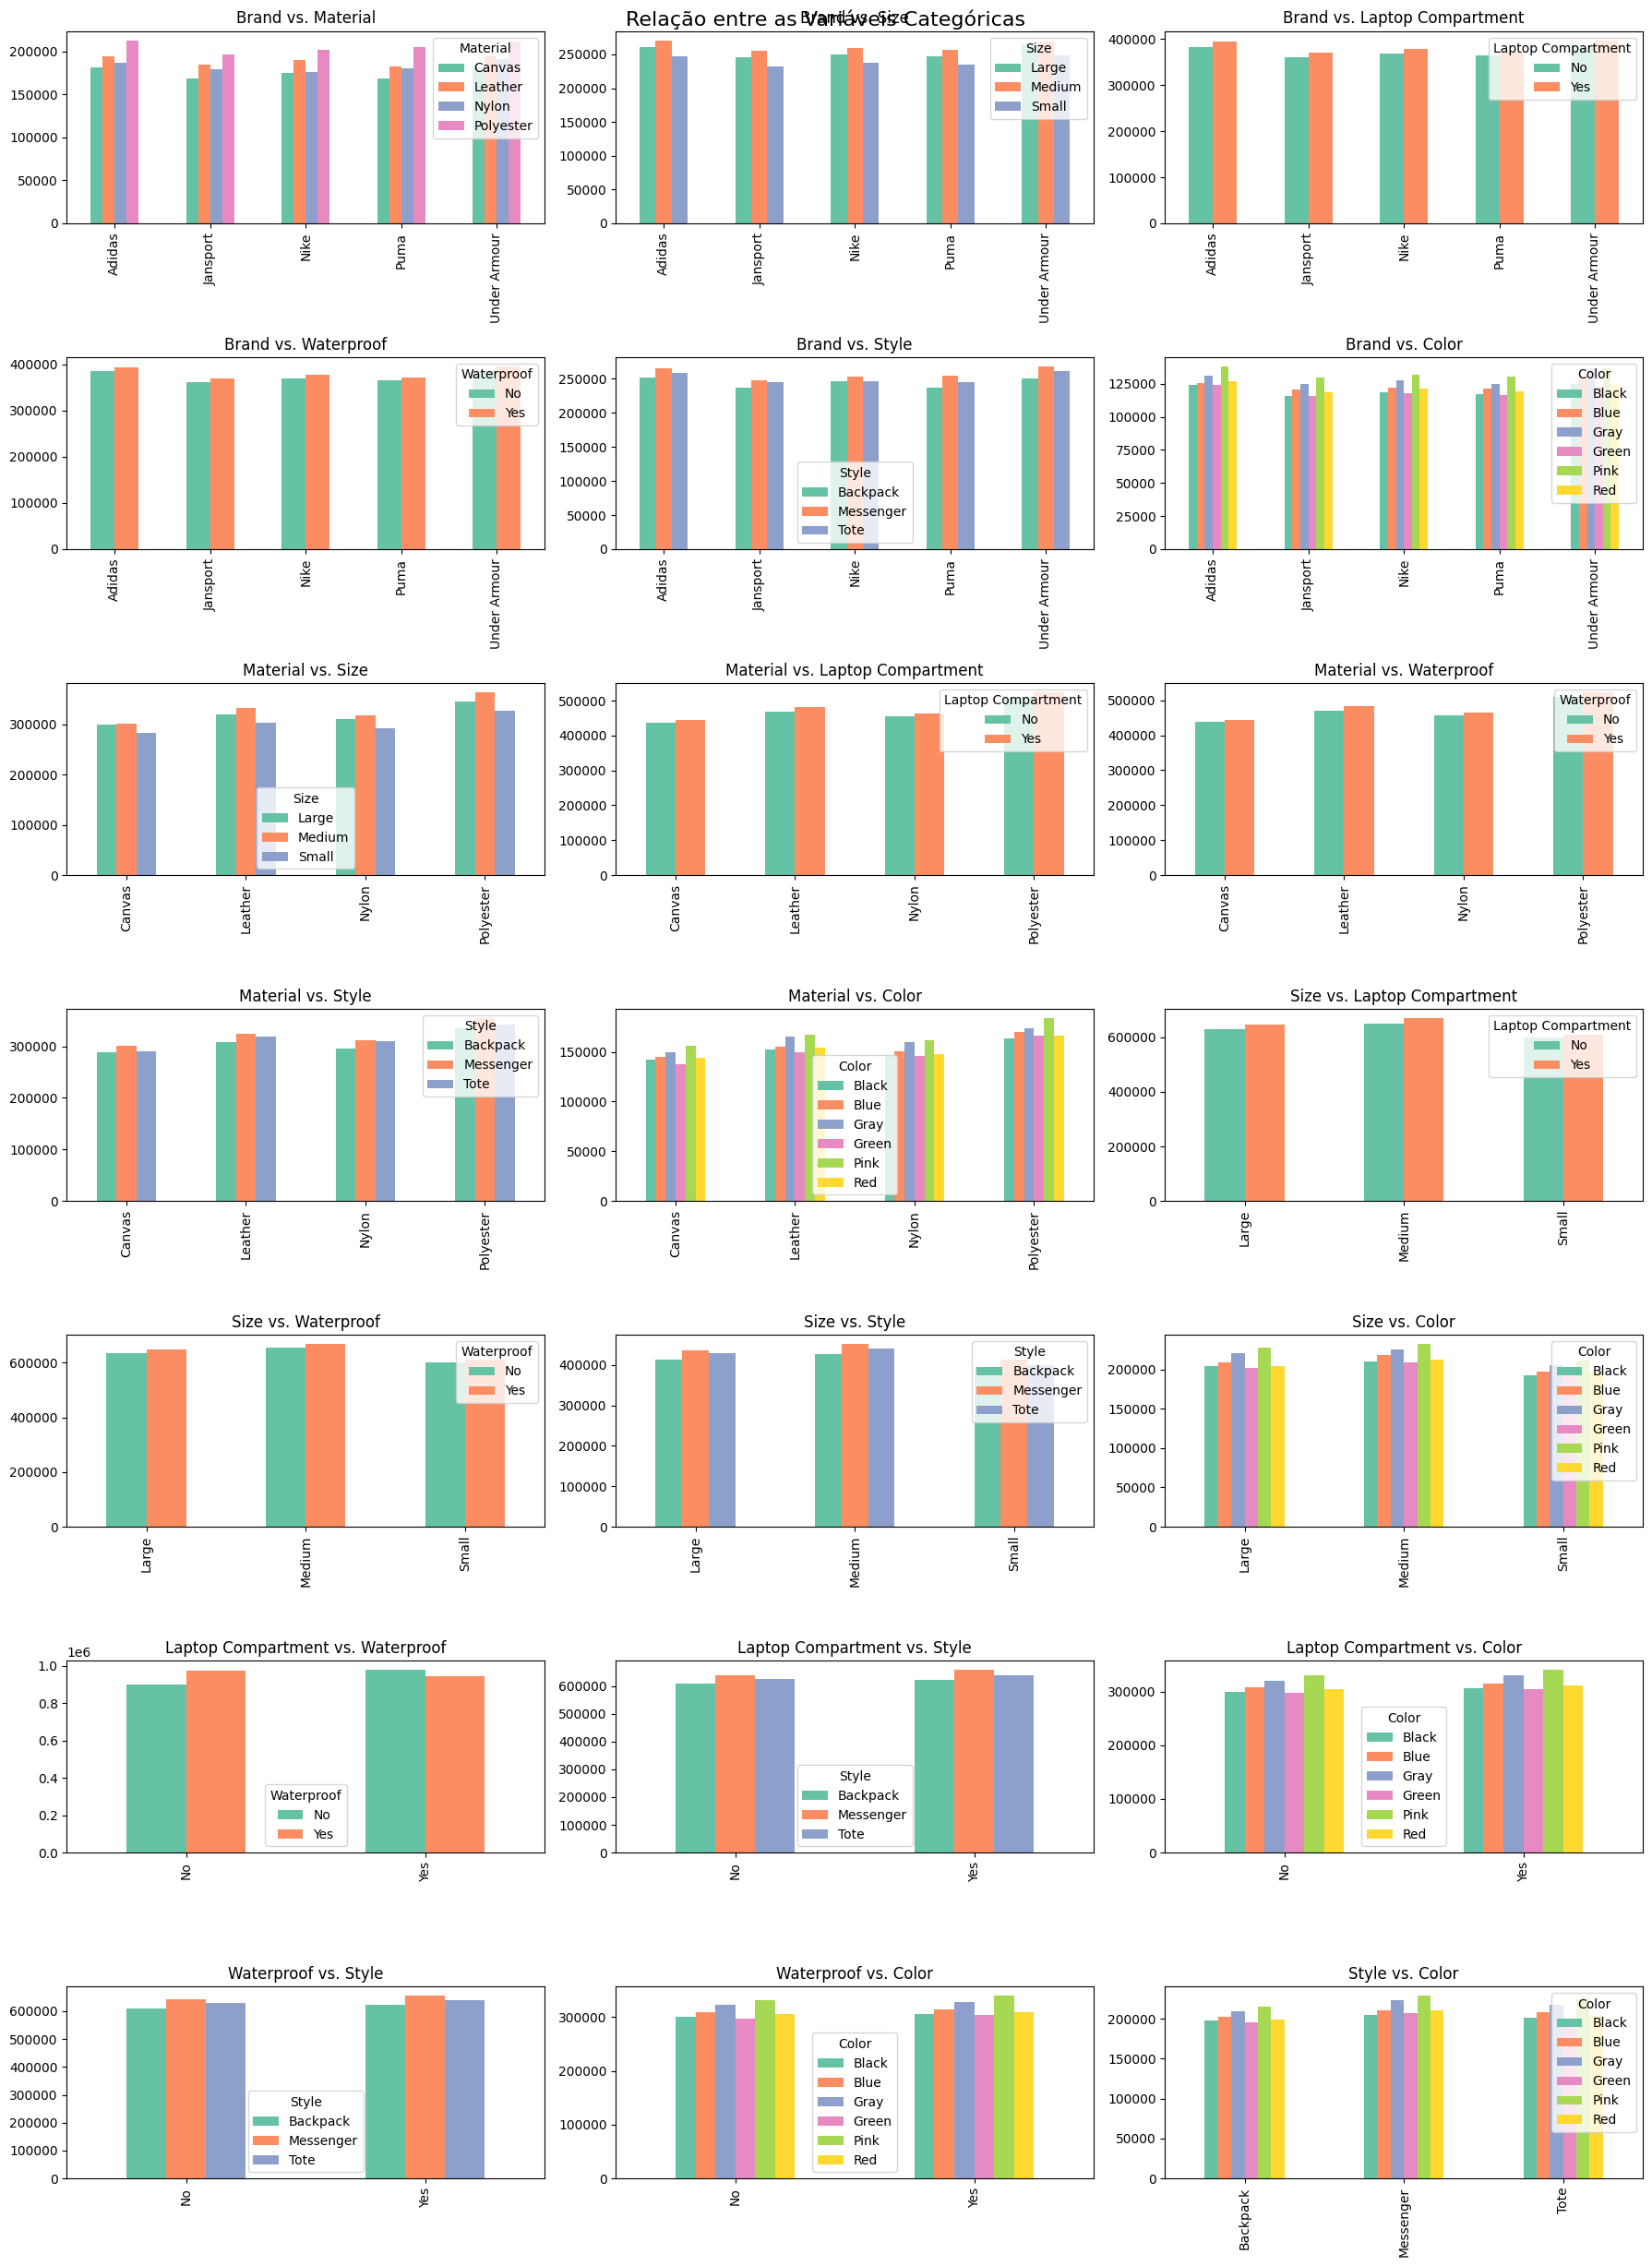

In [11]:
# Categorical features' relations
plt.figure(figsize=(18, 25))
ncols = 3
nrows = math.ceil(math.comb(len(cat_columns), 2) / ncols)
counter = 1
plt.suptitle('Relação entre as Variáveis Categóricas', fontsize=16)

for i in range(len(cat_columns) - 1):
    for j in range(i + 1, len(cat_columns)):
        # Create subplots
        plt.subplot(nrows, ncols, counter)
        
        # Create the contingency table
        crosstab = pd.crosstab(df[cat_columns[i]], df[cat_columns[j]])
        
        # Plot the bar chart of the contingency table
        crosstab.plot(kind='bar', stacked=False, ax=plt.gca(), color=sns.color_palette("Set2"))
        
        plt.title(f'{cat_columns[i]} vs. {cat_columns[j]}', fontsize=12)
        plt.xlabel("")
        plt.ylabel("")
        counter += 1

plt.tight_layout()
plt.show()

### PREENCHENDO OS VALORES NAN

In [12]:
df.groupby('Size')["Compartments"].agg(['min', 'max'])

,min,max
Size,,
Large,1.0,10.0
Medium,1.0,10.0
Small,1.0,10.0


In [13]:
# Calcular a média de 'Weight capacity' para cada categoria de 'Size'
mean_weights = df.groupby('Size')['Compartments'].mean()

# Função para separar os valores menores e maiores em relação à média
def mean_of_sides(group, mean_value):
    # Valores menores que a média
    lower_values = group[group < mean_value]
    # Valores maiores ou iguais à média
    higher_values = group[group >= mean_value]
    
    # Calcular a média das menores e maiores capacidades de peso
    mean_lower = lower_values.mean() if len(lower_values) > 0 else None
    mean_higher = higher_values.mean() if len(higher_values) > 0 else None
    
    return pd.Series({
        'mean_lower': mean_lower,
        'mean_higher': mean_higher
    })

# Aplicar a função para calcular as médias das menores e maiores capacidades para cada categoria de 'Size'
result = df.groupby('Size')['Compartments'].apply(lambda group: mean_of_sides(group, mean_weights[group.name]))

# Exibir o resultado
print(result)


Size               
Large   mean_lower     2.989167
        mean_higher    8.040590
Medium  mean_lower     2.982488
        mean_higher    8.024224
Small   mean_lower     2.977941
        mean_higher    8.034793
Name: Compartments, dtype: float64


In [14]:
mean_values = df.groupby('Size')['Weight Capacity (kg)'].mean()

# Exibir as médias de outras colunas
print(mean_values)

Size
Large     18.003480
Medium    18.036088
Small     17.955059
Name: Weight Capacity (kg), dtype: float64


In [15]:
cat_columns = ['Brand', 'Material', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

# Comparando a proporção de cada valor de 'Size' para cada coluna categórica
for column in cat_columns:
    # Gerar a tabela de contingência
    contingency_table = pd.crosstab(df['Size'], df[column], normalize='index')  # Normalize por linha (tamanho)
    
    # Exibir as proporções
    print(f"Proporção entre 'Size' e '{column}':")
    print(contingency_table)
    print("\n" + "="*50 + "\n")


Proporção entre 'Size' e 'Brand':
Brand     Adidas  Jansport      Nike      Puma  Under Armour
Size                                                        
Large   0.205856  0.193675  0.196878  0.194939      0.208651
Medium  0.206463  0.194536  0.198238  0.195676      0.205087
Small   0.205991  0.193043  0.198048  0.195406      0.207512


Proporção entre 'Size' e 'Material':
Material    Canvas   Leather     Nylon  Polyester
Size                                             
Large     0.234603  0.251185  0.243240   0.270972
Medium    0.229269  0.252030  0.241982   0.276719
Small     0.235140  0.251416  0.242510   0.270935


Proporção entre 'Size' e 'Laptop Compartment':
Laptop Compartment        No       Yes
Size                                  
Large               0.493621  0.506379
Medium              0.491714  0.508286
Small               0.495475  0.504525


Proporção entre 'Size' e 'Waterproof':
Waterproof        No       Yes
Size                          
Large       0.495076  0.5

In [16]:
import scipy.stats as stats

# Comparar 'Size' com cada coluna categórica usando o teste qui-quadrado
for column in cat_columns:
    # Gerar a tabela de contingência entre 'Size' e a coluna categórica
    contingency_table = pd.crosstab(df['Size'], df[column])
    
    # Realizar o teste de qui-quadrado
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Exibir os resultados
    print(f"Testando a associação entre 'Size' e '{column}':")
    print(f"Valor do qui-quadrado: {chi2}")
    print(f"Valor p: {p:.12f}")
    print(f"Grau de liberdade: {dof}")
    print(f"Tabela esperada:\n{expected}")
    
    if p < 0.05:
        print(f"Hipótese rejeitada: Existe uma associação significativa entre 'Size' e '{column}'.\n")
    else:
        print(f"Hipótese não rejeitada: Não há associação significativa entre 'Size' e '{column}'.\n")
    
    print("="*50 + "\n")


Testando a associação entre 'Size' e 'Brand':
Valor do qui-quadrado: 58.750360660148395
Valor p: 0.000000000819
Grau de liberdade: 8
Tabela esperada:
[[261754.21499332 246087.40286023 251101.22605762 248080.97607342
  262953.18001541]
 [270300.74794543 254122.3989641  259299.92842759 256181.0643064
  271538.86035648]
 [247336.03706125 232532.19817567 237269.84551479 234415.95962018
  248468.95962811]]
Hipótese rejeitada: Existe uma associação significativa entre 'Size' e 'Brand'.


Testando a associação entre 'Size' e 'Material':
Valor do qui-quadrado: 227.31165241876167
Valor p: 0.000000000000
Grau de liberdade: 6
Tabela esperada:
[[296999.56820189 320751.05757972 309301.97127098 348040.40294741]
 [306707.13541774 331234.95312832 319411.6481782  359416.26327575]
 [280696.29638037 303143.98929197 292323.38055082 328935.33377685]]
Hipótese rejeitada: Existe uma associação significativa entre 'Size' e 'Material'.


Testando a associação entre 'Size' e 'Laptop Compartment':
Valor do qui-q

In [17]:
for column in cat_columns:
    # Tabela de contingência
    contingency_table = pd.crosstab(df['Size'], df[column])
    
    # Calcular as proporções de cada categoria de 'Size' para cada valor de 'column'
    proportion_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    
    print(f"Proporções de '{column}' para cada valor de 'Size':")
    print(proportion_table)
    print("="*50 + "\n")


Proporções de 'Brand' para cada valor de 'Size':
Brand     Adidas  Jansport      Nike      Puma  Under Armour
Size                                                        
Large   0.205856  0.193675  0.196878  0.194939      0.208651
Medium  0.206463  0.194536  0.198238  0.195676      0.205087
Small   0.205991  0.193043  0.198048  0.195406      0.207512

Proporções de 'Material' para cada valor de 'Size':
Material    Canvas   Leather     Nylon  Polyester
Size                                             
Large     0.234603  0.251185  0.243240   0.270972
Medium    0.229269  0.252030  0.241982   0.276719
Small     0.235140  0.251416  0.242510   0.270935

Proporções de 'Laptop Compartment' para cada valor de 'Size':
Laptop Compartment        No       Yes
Size                                  
Large               0.493621  0.506379
Medium              0.491714  0.508286
Small               0.495475  0.504525

Proporções de 'Waterproof' para cada valor de 'Size':
Waterproof        No       Yes

In [18]:
for column in cat_columns:
    # Calcular a proporção de 'Size' para cada valor de 'Material'
    size_distribution = pd.crosstab(df[column], df['Size'], normalize='index')
    
    print(f"Distribuição de 'Size' por '{column}':")
    print(size_distribution)
    print("="*50 + "\n")


Distribuição de 'Size' por 'Brand':
Size             Large    Medium     Small
Brand                                     
Adidas        0.335432  0.347405  0.317163
Jansport      0.335675  0.348176  0.316149
Nike          0.334413  0.347717  0.317870
Puma          0.335150  0.347402  0.317448
Under Armour  0.338436  0.343516  0.318048

Distribuição de 'Size' por 'Material':
Size          Large    Medium     Small
Material                               
Canvas     0.338241  0.341355  0.320405
Leather    0.335330  0.347455  0.317214
Nylon      0.336744  0.345952  0.317303
Polyester  0.333382  0.351580  0.315038

Distribuição de 'Size' por 'Laptop Compartment':
Size                   Large    Medium     Small
Laptop Compartment                              
No                  0.335801  0.345440  0.318759
Yes                 0.335704  0.347984  0.316312

Distribuição de 'Size' por 'Waterproof':
Size           Large    Medium     Small
Waterproof                              
No          0

In [19]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Número total de observações
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

for column in cat_columns:
    # Gerar a tabela de contingência
    confusion_matrix = pd.crosstab(df['Size'], df[column])
    
    # Calcular o Cramér's V
    v = cramers_v(confusion_matrix)
    print(f"Cramér's V entre 'Size' e '{column}': {v}")


Cramér's V entre 'Size' e 'Brand': 0.002787157374523511
Cramér's V entre 'Size' e 'Material': 0.005471138719000249
Cramér's V entre 'Size' e 'Laptop Compartment': 0.0030641426488446644
Cramér's V entre 'Size' e 'Waterproof': 0.0013393935031768835
Cramér's V entre 'Size' e 'Style': 0.0035502014296794667
Cramér's V entre 'Size' e 'Color': 0.0041400320917214534


In [20]:
import scipy.stats as stats

# Teste ANOVA para 'Compartments' e 'Size'
f_value_compartments, p_value_compartments = stats.f_oneway(
    df[df['Size'] == 'Large']['Compartments'],
    df[df['Size'] == 'Medium']['Compartments'],
    df[df['Size'] == 'Small']['Compartments']
)

# Teste ANOVA para 'Weight Capacity' e 'Size'
f_value_weight_capacity, p_value_weight_capacity = stats.f_oneway(
    df[df['Size'] == 'Large']['Weight Capacity (kg)'],
    df[df['Size'] == 'Medium']['Weight Capacity (kg)'],
    df[df['Size'] == 'Small']['Weight Capacity (kg)']
)

# Exibir os resultados
print("ANOVA para 'Compartments' vs. 'Size':")
print(f"F-value: {f_value_compartments}, p-value: {p_value_compartments}")

print("\nANOVA para 'Weight Capacity (kg)' vs. 'Size':")
print(f"F-value: {f_value_weight_capacity}, p-value: {p_value_weight_capacity}")


ANOVA para 'Compartments' vs. 'Size':
F-value: 28.2610772089532, p-value: 5.326708193457057e-13

ANOVA para 'Weight Capacity (kg)' vs. 'Size':
F-value: nan, p-value: nan


In [21]:
df_clean = df.dropna(subset=['Size', 'Compartments', 'Weight Capacity (kg)'])

from scipy import stats

# Aplicando ANOVA para 'Compartments' vs 'Size'
f_value_compartments, p_value_compartments = stats.f_oneway(
    df_clean[df_clean['Size'] == 'Large']['Compartments'],
    df_clean[df_clean['Size'] == 'Medium']['Compartments'],
    df_clean[df_clean['Size'] == 'Small']['Compartments']
)

# Aplicando ANOVA para 'Weight Capacity (kg)' vs 'Size'
f_value_weight_capacity, p_value_weight_capacity = stats.f_oneway(
    df_clean[df_clean['Size'] == 'Large']['Weight Capacity (kg)'],
    df_clean[df_clean['Size'] == 'Medium']['Weight Capacity (kg)'],
    df_clean[df_clean['Size'] == 'Small']['Weight Capacity (kg)']
)

# Exibindo os resultados
print(f"ANOVA para 'Compartments' vs 'Size' - F-value: {f_value_compartments}, p-value: {p_value_compartments}")
print(f"ANOVA para 'Weight Capacity (kg)' vs 'Size' - F-value: {f_value_weight_capacity}, p-value: {p_value_weight_capacity}")


ANOVA para 'Compartments' vs 'Size' - F-value: 28.161950434019538, p-value: 5.88177662259698e-13
ANOVA para 'Weight Capacity (kg)' vs 'Size' - F-value: 43.99787271534413, p-value: 7.80156883340631e-20


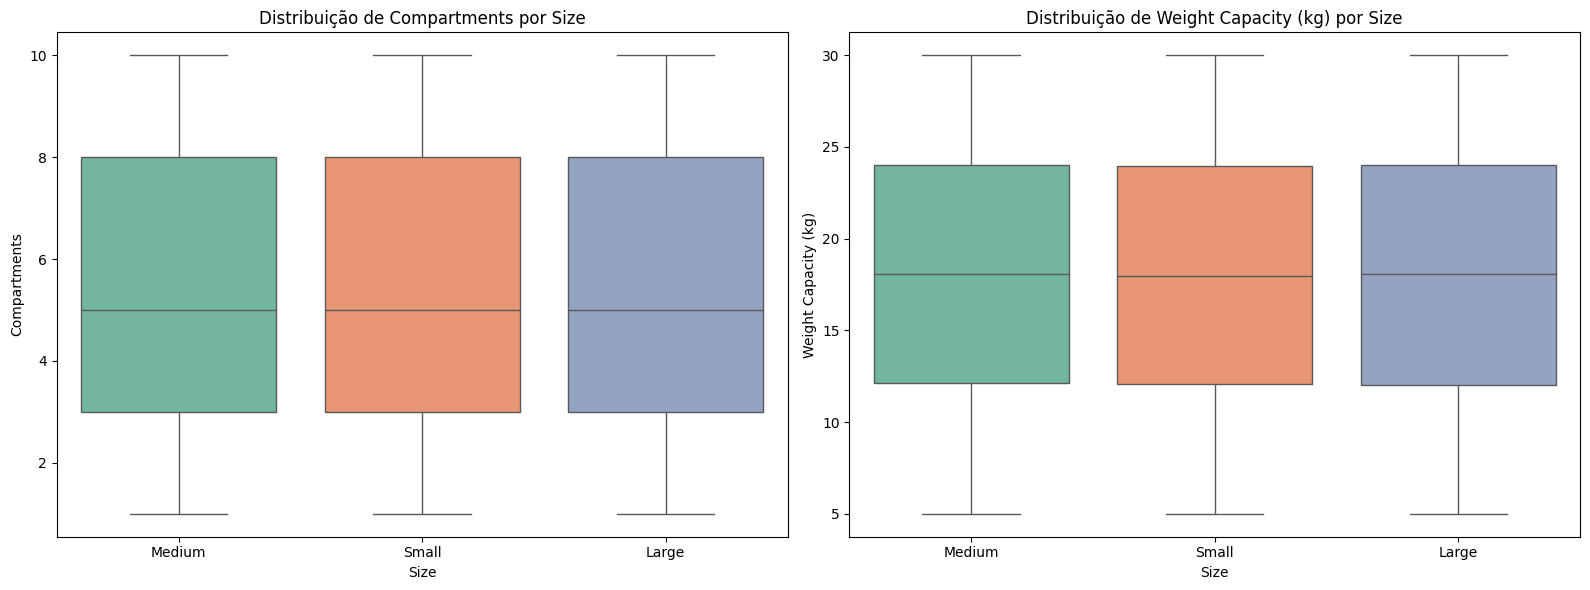

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tamanho da figura
plt.figure(figsize=(16, 6))

# Plot de 'Compartments' por 'Size'
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='Size', y='Compartments', palette='Set2')
plt.title('Distribuição de Compartments por Size')

# Plot de 'Weight Capacity (kg)' por 'Size'
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Size', y='Weight Capacity (kg)', palette='Set2')
plt.title('Distribuição de Weight Capacity (kg) por Size')

# Exibir os gráficos
plt.tight_layout()
plt.show()


In [23]:
# Estatísticas descritivas para 'Compartments' e 'Weight Capacity (kg)' agrupadas por 'Size'
compartments_stats = df_clean.groupby('Size')['Compartments'].describe()
weight_capacity_stats = df_clean.groupby('Size')['Weight Capacity (kg)'].describe()

# Exibindo as estatísticas
print("Estatísticas Descritivas de 'Compartments' por 'Size':\n", compartments_stats)
print("\nEstatísticas Descritivas de 'Weight Capacity (kg)' por 'Size':\n", weight_capacity_stats)

Estatísticas Descritivas de 'Compartments' por 'Size':
             count      mean       std  min  25%  50%  75%   max
Size                                                           
Large   1311771.0  5.452032  2.891694  1.0  3.0  5.0  8.0  10.0
Medium  1354026.0  5.427041  2.886722  1.0  3.0  5.0  8.0  10.0
Small   1239347.0  5.431303  2.894772  1.0  3.0  5.0  8.0  10.0

Estatísticas Descritivas de 'Weight Capacity (kg)' por 'Size':
             count       mean       std  min        25%        50%        75%  \
Size                                                                           
Large   1311771.0  18.003480  7.002326  5.0  12.023663  18.080119  23.992236   
Medium  1354026.0  18.036088  6.963416  5.0  12.121937  18.071074  24.019214   
Small   1239347.0  17.955059  6.958800  5.0  12.053340  17.965752  23.945470   

         max  
Size          
Large   30.0  
Medium  30.0  
Small   30.0  


In [24]:
import pandas as pd
import numpy as np
from scipy import stats

# Função para calcular Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Função para calcular ANOVA
def anova_test(df, numeric_column, categorical_column):
    groups = [df[numeric_column][df[categorical_column] == category] for category in df[categorical_column].unique()]
    f_value, p_value = stats.f_oneway(*groups)
    return f_value, p_value

# Função principal
def test_feature_relationships(df, num_columns, cat_columns):
    # Limpeza do dataframe removendo NaN nas colunas relevantes
    df_clean = df.dropna(subset=num_columns + cat_columns)
    
    # Testes ANOVA para variáveis numéricas vs variáveis categóricas
    for column in num_columns:
        for cat_column in cat_columns:
            f_value, p_value = anova_test(df_clean, column, cat_column)
            print(f"ANOVA para '{column}' vs '{cat_column}'")
            if p_value < 0.05:
                print(f"Existe uma associação significativa entre '{column}' e '{cat_column}'.")
            else:
                print(f"Não existe associação significativa entre '{column}' e '{cat_column}'.")
            print("="*50)
    
    # Teste Cramér's V para variáveis categóricas entre si
    for col1 in cat_columns:
        for col2 in cat_columns:
            if col1 != col2:
                v_value = cramers_v(df_clean[col1], df_clean[col2])
                print(f"Cramér's V entre '{col1}' e '{col2}': {v_value}")
                if v_value > 0.1:
                    print(f"Existe uma associação moderada entre '{col1}' e '{col2}'.")
                else:
                    print(f"Não existe associação significativa entre '{col1}' e '{col2}'.")
                print("="*50)

# Exemplo de uso
# Supondo que df seja o seu DataFrame e você tenha as colunas numéricas e categóricas definidas
num_columns = ['Compartments', 'Weight Capacity (kg)']  # Exemplo de variáveis numéricas
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']  # Exemplo de variáveis categóricas

# Chame a função de teste
test_feature_relationships(df, num_columns, cat_columns)

ANOVA para 'Compartments' vs 'Brand'
Existe uma associação significativa entre 'Compartments' e 'Brand'.
ANOVA para 'Compartments' vs 'Material'
Existe uma associação significativa entre 'Compartments' e 'Material'.
ANOVA para 'Compartments' vs 'Size'
Existe uma associação significativa entre 'Compartments' e 'Size'.
ANOVA para 'Compartments' vs 'Laptop Compartment'
Existe uma associação significativa entre 'Compartments' e 'Laptop Compartment'.
ANOVA para 'Compartments' vs 'Waterproof'
Existe uma associação significativa entre 'Compartments' e 'Waterproof'.
ANOVA para 'Compartments' vs 'Style'
Existe uma associação significativa entre 'Compartments' e 'Style'.
ANOVA para 'Compartments' vs 'Color'
Existe uma associação significativa entre 'Compartments' e 'Color'.
ANOVA para 'Weight Capacity (kg)' vs 'Brand'
Existe uma associação significativa entre 'Weight Capacity (kg)' e 'Brand'.
ANOVA para 'Weight Capacity (kg)' vs 'Material'
Existe uma associação significativa entre 'Weight Capaci

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Teste de Kruskal-Wallis
def kruskal_test(df, numeric_column, categorical_column):
    groups = [df[numeric_column][df[categorical_column] == category] for category in df[categorical_column].unique()]
    stat, p_value = stats.kruskal(*groups)
    return p_value

# Função para testar Kruskal-Wallis entre as variáveis numéricas e categóricas
def test_kruskal_with_validation(df, num_columns, cat_columns):
    # Limpeza dos dados
    df_clean = df.dropna(subset=num_columns + cat_columns)
    
    # Teste de Kruskal-Wallis
    for column in num_columns:
        for cat_column in cat_columns:
            print(f"Verificando '{column}' vs '{cat_column}'")

            # Aplicando o Kruskal-Wallis
            p_value = kruskal_test(df_clean, column, cat_column)
            print(f"p-value do Teste de Kruskal-Wallis para '{column}' e '{cat_column}': {p_value:.4e}")
            
            # Interpretação
            if p_value < 0.05:
                print(f"Existe uma associação significativa entre '{column}' e '{cat_column}'.")
            else:
                print(f"Não existe associação significativa entre '{column}' e '{cat_column}'.")
            print("="*50)

# Exemplo de uso
num_columns = ['Compartments', 'Weight Capacity (kg)']
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

test_kruskal_with_validation(df, num_columns, cat_columns)


Verificando 'Compartments' vs 'Brand'
p-value do Teste de Kruskal-Wallis para 'Compartments' e 'Brand': 4.9364e-19
Existe uma associação significativa entre 'Compartments' e 'Brand'.
Verificando 'Compartments' vs 'Material'
p-value do Teste de Kruskal-Wallis para 'Compartments' e 'Material': 1.6833e-20
Existe uma associação significativa entre 'Compartments' e 'Material'.
Verificando 'Compartments' vs 'Size'
p-value do Teste de Kruskal-Wallis para 'Compartments' e 'Size': 2.0668e-09
Existe uma associação significativa entre 'Compartments' e 'Size'.
Verificando 'Compartments' vs 'Laptop Compartment'
p-value do Teste de Kruskal-Wallis para 'Compartments' e 'Laptop Compartment': 1.1986e-06
Existe uma associação significativa entre 'Compartments' e 'Laptop Compartment'.
Verificando 'Compartments' vs 'Waterproof'
p-value do Teste de Kruskal-Wallis para 'Compartments' e 'Waterproof': 2.6290e-07
Existe uma associação significativa entre 'Compartments' e 'Waterproof'.
Verificando 'Compartments

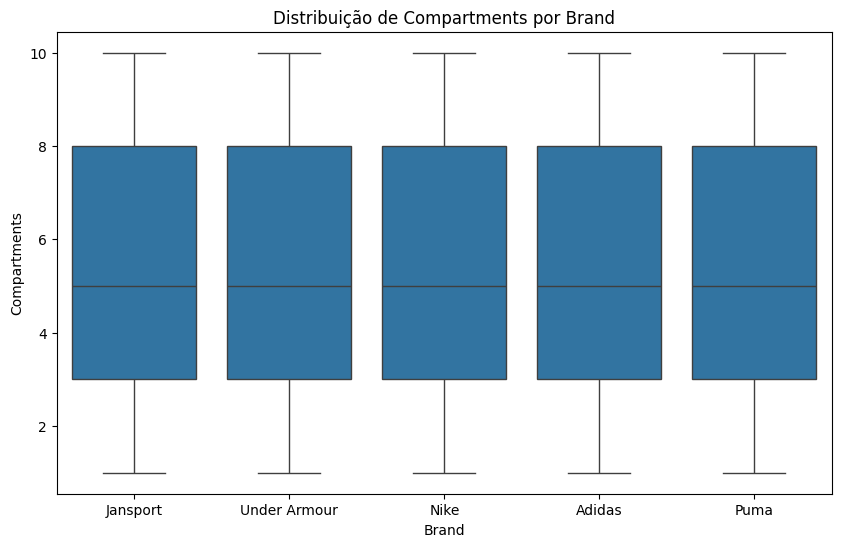

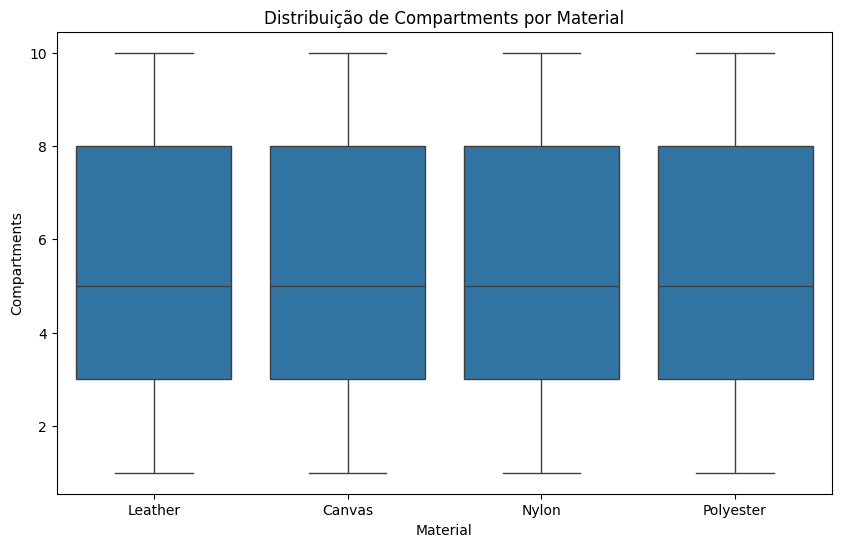

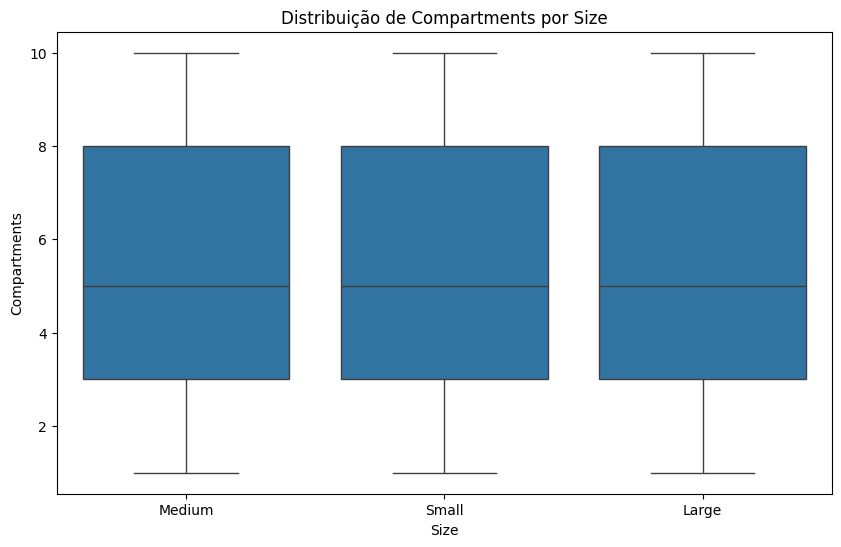

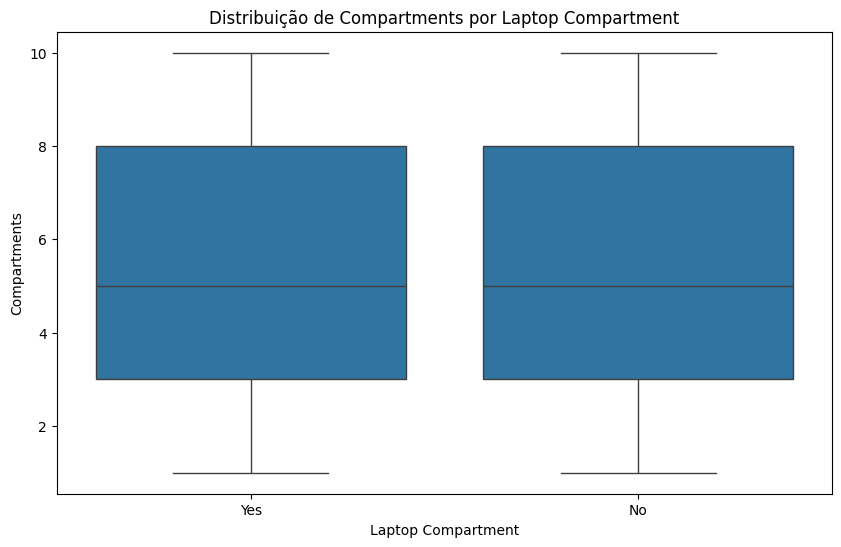

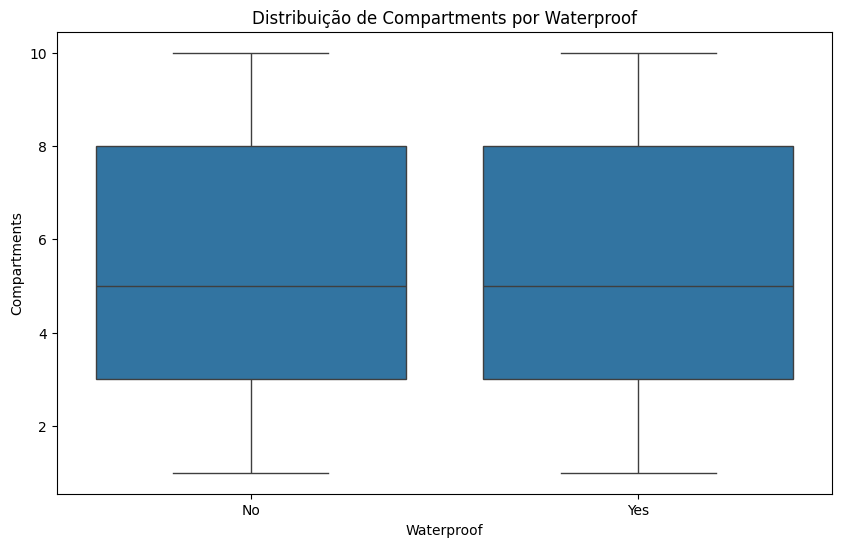

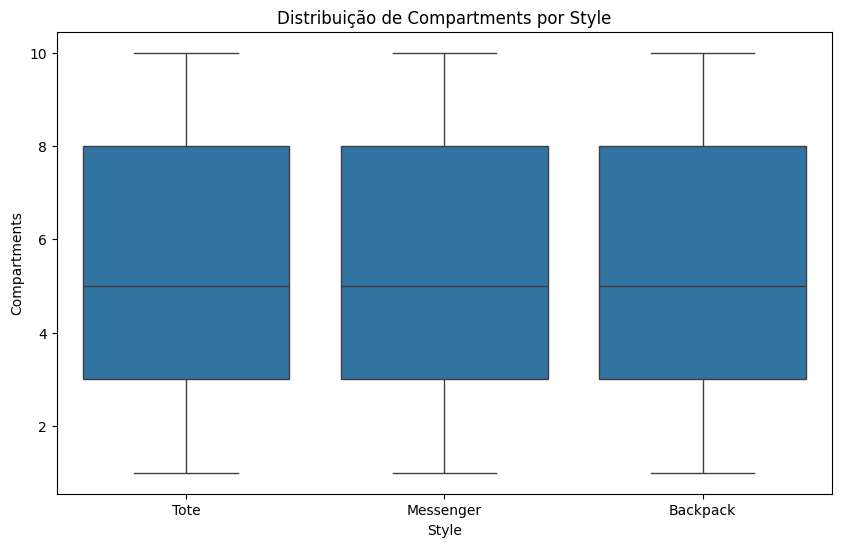

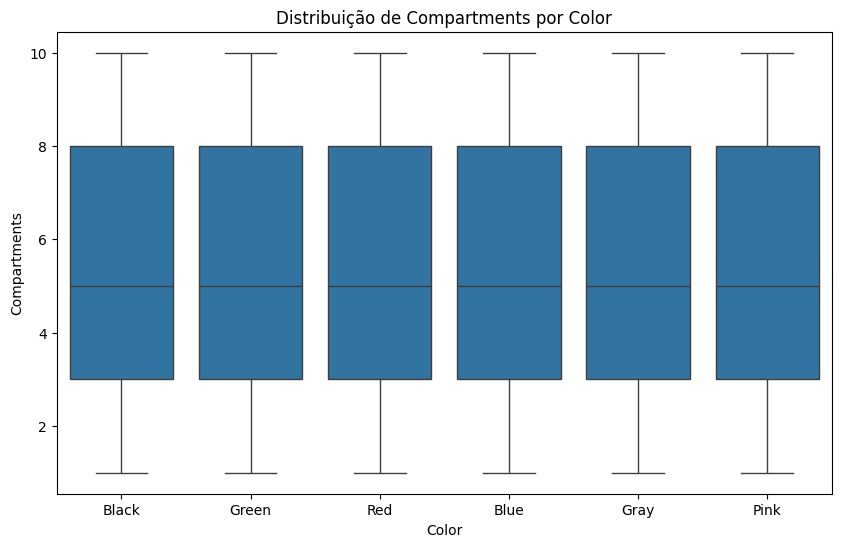

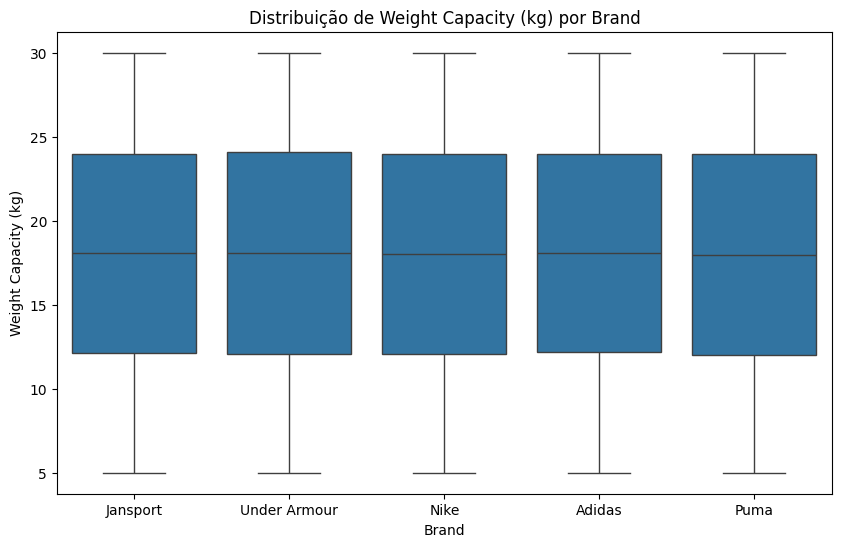

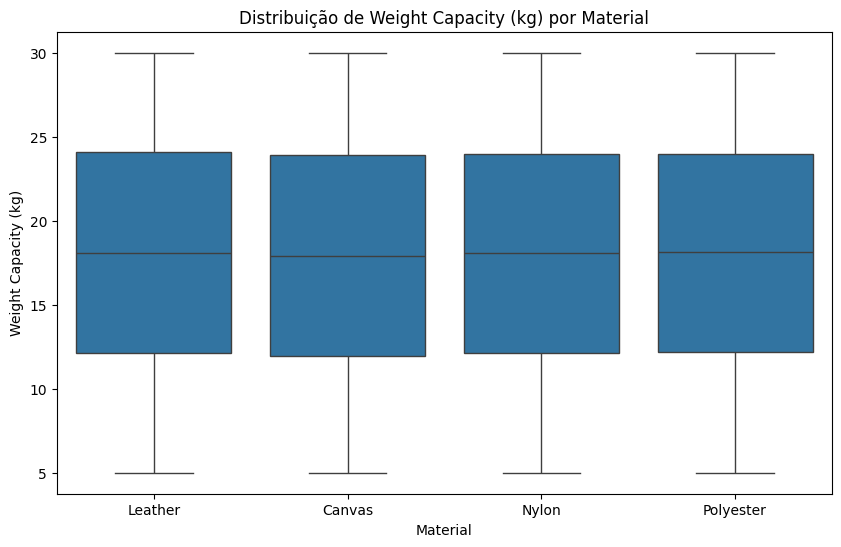

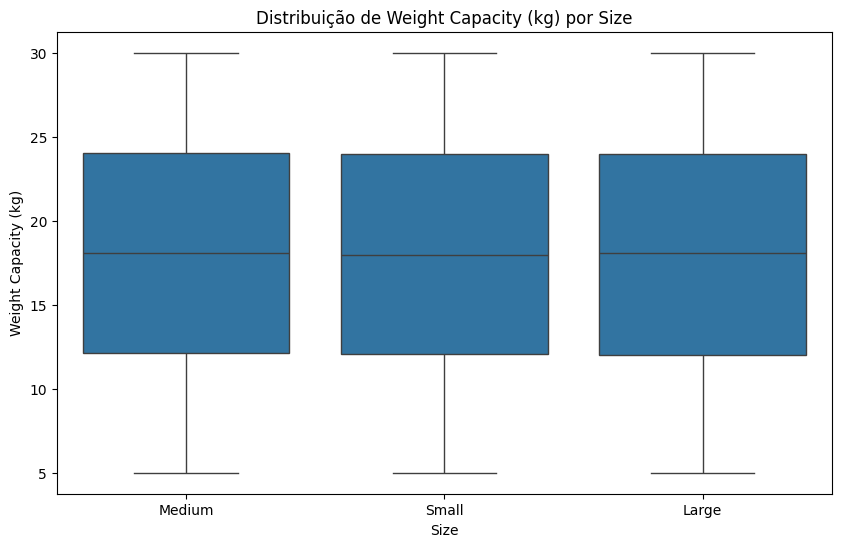

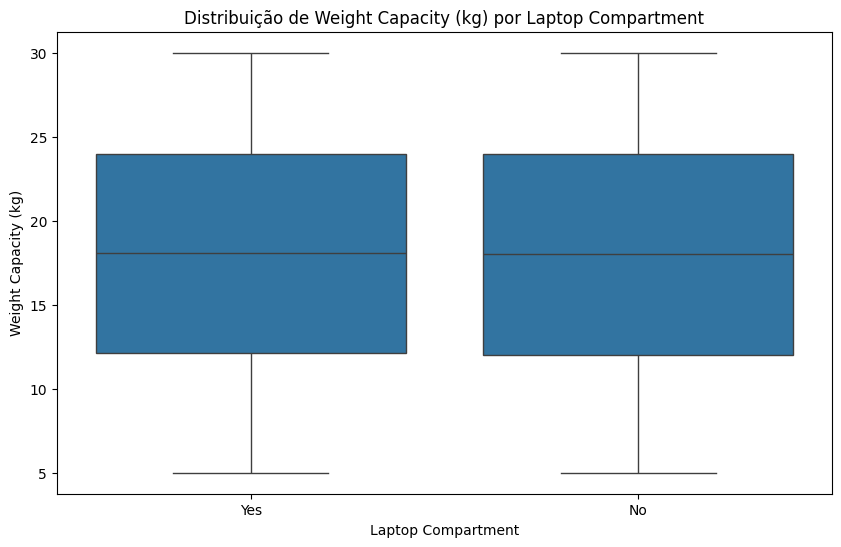

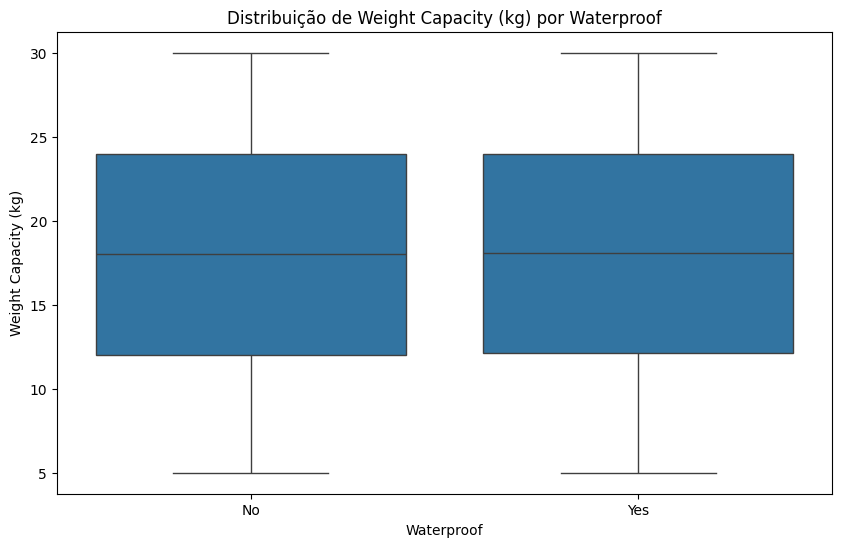

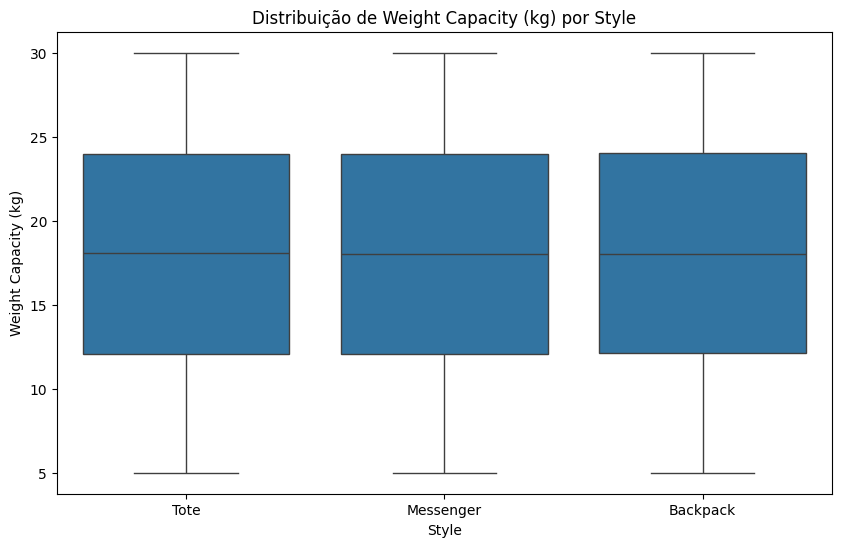

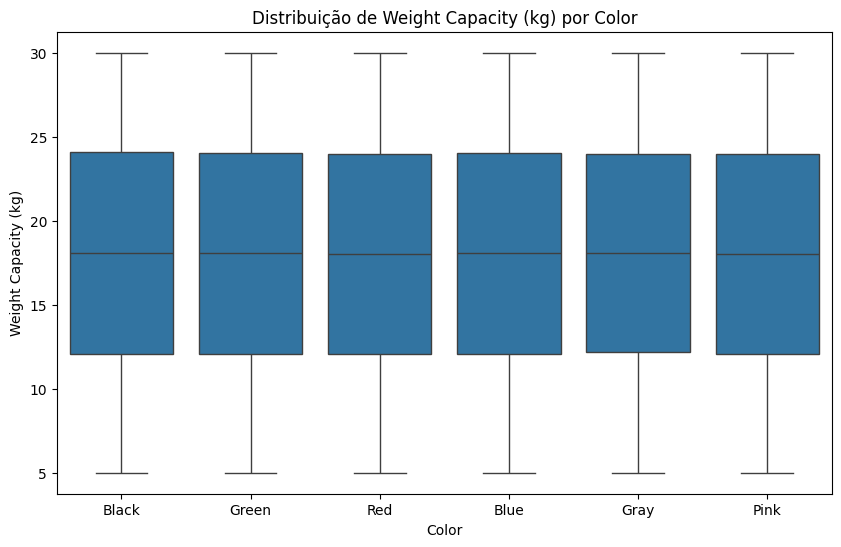

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de Compartments por cada variável categórica
for cat_column in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_column, y='Compartments', data=df)
    plt.title(f'Distribuição de Compartments por {cat_column}')
    plt.show()

# Boxplot de Weight Capacity (kg) por cada variável categórica
for cat_column in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_column, y='Weight Capacity (kg)', data=df)
    plt.title(f'Distribuição de Weight Capacity (kg) por {cat_column}')
    plt.show()


In [27]:
from scipy.stats import kruskal

# Exemplo de dados (substitua com suas variáveis reais)
# df_clean é o seu dataframe já sem valores NaN

def kruskal_eta_squared(df, col_categ, col_num):
    """
    Realiza o teste de Kruskal-Wallis e calcula o eta quadrado (η²).
    """
    # Lista das categorias da variável categórica
    categories = df[col_categ].unique()

    # Separando os dados por categoria
    groups = [df[df[col_categ] == category][col_num] for category in categories]

    # Executando o teste de Kruskal-Wallis
    H, p_value = kruskal(*groups)

    # Número de observações
    n = len(df)

    # Calculando o eta quadrado (η²)
    eta_squared = H / (n - 1)

    # Exibindo os resultados
    print(f"Teste Kruskal-Wallis para {col_categ} vs {col_num}")
    print(f"Estatístico H: {H:.4f}, p-valor: {p_value:.4f}")
    print(f"Eta quadrado (η²): {eta_squared:.4f}")

    # Verificando a significância
    if p_value < 0.05:
        print(f"Existe uma associação significativa entre {col_categ} e {col_num}")
    else:
        print(f"Não existe associação significativa entre {col_categ} e {col_num}")

# Exemplo de chamada da função para 'Compartments' e 'Size'
kruskal_eta_squared(df_clean, 'Size', 'Compartments')

# Exemplo de chamada da função para 'Weight Capacity (kg)' e 'Size'
kruskal_eta_squared(df_clean, 'Size', 'Weight Capacity (kg)')


Teste Kruskal-Wallis para Size vs Compartments
Estatístico H: 56.5443, p-valor: 0.0000
Eta quadrado (η²): 0.0000
Existe uma associação significativa entre Size e Compartments
Teste Kruskal-Wallis para Size vs Weight Capacity (kg)
Estatístico H: 88.7925, p-valor: 0.0000
Eta quadrado (η²): 0.0000
Existe uma associação significativa entre Size e Weight Capacity (kg)


In [28]:
from scipy.stats import kruskal

# Função para calcular o eta quadrado (η²) para o teste Kruskal-Wallis entre uma variável categórica
# e uma variável numérica
def kruskal_eta_squared(df, col_categ, col_num):
    """
    Calcula o eta quadrado (η²) para o teste Kruskal-Wallis entre uma variável categórica
    e uma variável numérica.
    """
    # Lista das categorias da variável categórica
    categories = df[col_categ].unique()

    # Separando os dados por categoria
    groups = [df[df[col_categ] == category][col_num] for category in categories]

    # Executando o teste de Kruskal-Wallis
    H, _ = kruskal(*groups)

    # Número de observações
    n = len(df)

    # Calculando o eta quadrado (η²)
    eta_squared = H / (n - 1)

    return eta_squared

# Lista das variáveis categóricas
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

# Variáveis numéricas que serão testadas com as variáveis categóricas
num_columns = ['Compartments', 'Weight Capacity (kg)']

# Excluindo valores NaN nas variáveis de interesse (todas as colunas categóricas e numéricas)
df_clean = df.dropna(subset=cat_columns + num_columns)

# Calculando o eta quadrado (η²) para cada combinação de variável categórica e numérica
for num_col in num_columns:
    for cat_col in cat_columns:
        eta_sq = kruskal_eta_squared(df_clean, cat_col, num_col)
        print(f"Eta quadrado (η²) entre '{cat_col}' e '{num_col}': {eta_sq:.4f}")


Eta quadrado (η²) entre 'Brand' e 'Compartments': 0.0000
Eta quadrado (η²) entre 'Material' e 'Compartments': 0.0000
Eta quadrado (η²) entre 'Size' e 'Compartments': 0.0000
Eta quadrado (η²) entre 'Laptop Compartment' e 'Compartments': 0.0000
Eta quadrado (η²) entre 'Waterproof' e 'Compartments': 0.0000
Eta quadrado (η²) entre 'Style' e 'Compartments': 0.0001
Eta quadrado (η²) entre 'Color' e 'Compartments': 0.0000
Eta quadrado (η²) entre 'Brand' e 'Weight Capacity (kg)': 0.0000
Eta quadrado (η²) entre 'Material' e 'Weight Capacity (kg)': 0.0001
Eta quadrado (η²) entre 'Size' e 'Weight Capacity (kg)': 0.0000
Eta quadrado (η²) entre 'Laptop Compartment' e 'Weight Capacity (kg)': 0.0000
Eta quadrado (η²) entre 'Waterproof' e 'Weight Capacity (kg)': 0.0000
Eta quadrado (η²) entre 'Style' e 'Weight Capacity (kg)': 0.0000
Eta quadrado (η²) entre 'Color' e 'Weight Capacity (kg)': 0.0000
